In [ ]:
!pip install -U ray[rllib]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.8/64.8 MB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 925.5/925.5 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 34.3 MB/s eta 0:00:00


Analyzing Tune Experiment Results

In [ ]:
import os

from ray import train, tune
from ray.tune.examples.mnist_pytorch import train_mnist
from ray.tune import ResultGrid

storage_path = "/tmp/ray_results"
exp_name = "tune_analyzing_results"
tuner = tune.Tuner(
    train_mnist,
    param_space={
        "lr": tune.loguniform(0.001, 0.1),
        "momentum": tune.grid_search([0.8, 0.9, 0.99]),
        "should_checkpoint": True,
    },
    run_config=train.RunConfig(
        name=exp_name,
        stop={"training_iteration": 100},
        checkpoint_config=train.CheckpointConfig(
            checkpoint_score_attribute="mean_accuracy",
            num_to_keep=5,
        ),
        storage_path=storage_path,
    ),
    tune_config=tune.TuneConfig(mode="max", metric="mean_accuracy", num_samples=3),
)
result_grid: ResultGrid = tuner.fit()

2024-01-23 11:32:22,607	INFO worker.py:1724 -- Started a local Ray instance.
2024-01-23 11:32:24,737	INFO tune.py:220 -- Initializing Ray automatically. For cluster usage or custom Ray initialization, call `ray.init(...)` before `Tuner(...)`.
2024-01-23 11:32:24,745	INFO tune.py:592 -- [output] This will use the new output engine with verbosity 1. To disable the new output and use the legacy output engine, set the environment variable RAY_AIR_NEW_OUTPUT=0. For more information, please see https://github.com/ray-project/ray/issues/36949


+-----------------------------------------------------------+
| Configuration for experiment     tune_analyzing_results   |
+-----------------------------------------------------------+
| Search algorithm                 BasicVariantGenerator    |
| Scheduler                        FIFOScheduler            |
| Number of trials                 9                        |
+-----------------------------------------------------------+

View detailed results here: /tmp/ray_results/tune_analyzing_results
To visualize your results with TensorBoard, run: `tensorboard --logdir /root/ray_results/tune_analyzing_results`

Trial status: 9 PENDING
Current time: 2024-01-23 11:32:25. Total running time: 0s
Logical resource usage: 0/2 CPUs, 0/0 GPUs
+--------------------------------------------------------------+
| Trial name                status             lr     momentum |
+--------------------------------------------------------------+
| train_mnist_147fb_00000   PENDING    0.00242943         0.8  

100%|██████████| 9912422/9912422 [00:00<00:00, 94572143.71it/s]


(train_mnist pid=858) Extracting /root/data/MNIST/raw/train-images-idx3-ubyte.gz to /root/data/MNIST/raw

Trial train_mnist_147fb_00000 started with configuration:
+--------------------------------------------------+
| Trial train_mnist_147fb_00000 config             |
+--------------------------------------------------+
| lr                                       0.00243 |
| momentum                                     0.8 |
| should_checkpoint                              1 |
+--------------------------------------------------+
(train_mnist pid=858) 
(train_mnist pid=858) Downloading http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz
(train_mnist pid=858) Downloading http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz to /root/data/MNIST/raw/train-labels-idx1-ubyte.gz
(train_mnist pid=858) Extracting /root/data/MNIST/raw/train-labels-idx1-ubyte.gz to /root/data/MNIST/raw
(train_mnist pid=858) 
(train_mnist pid=858) Downloading http://yann.lecun.com/exdb/mnist/t10k-ima

100%|██████████| 1648877/1648877 [00:00<00:00, 26652169.07it/s]


(train_mnist pid=858) Extracting /root/data/MNIST/raw/t10k-images-idx3-ubyte.gz to /root/data/MNIST/raw
(train_mnist pid=858) 
(train_mnist pid=858) Downloading http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz
(train_mnist pid=858) Downloading http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz to /root/data/MNIST/raw/t10k-labels-idx1-ubyte.gz
(train_mnist pid=858) Extracting /root/data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /root/data/MNIST/raw
(train_mnist pid=858) 


100%|██████████| 4542/4542 [00:00<00:00, 27892428.65it/s]
(train_mnist pid=858) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/tmp/ray_results/tune_analyzing_results/train_mnist_147fb_00001_1_lr=0.0071,momentum=0.9000_2024-01-23_11-32-25/checkpoint_000000)
2024-01-23 11:32:41,787	WARNING experiment_state.py:323 -- Experiment checkpoint syncing has been triggered multiple times in the last 30.0 seconds. A sync will be triggered whenever a trial has checkpointed more than `num_to_keep` times since last sync or if 300 seconds have passed since last sync. If you have set `num_to_keep` in your `CheckpointConfig`, consider increasing the checkpoint frequency or keeping more checkpoints. You can supress this warning by changing the `TUNE_WARN_EXCESSIVE_EXPERIMENT_CHECKPOINT_SYNC_THRESHOLD_S` environment variable.
2024-01-23 11:32:43,711	WARNING experiment_state.py:323 -- Experiment checkpoint syncing has been triggered multiple times in the last 30.0 seconds. A sync wi


Trial status: 2 RUNNING | 7 PENDING
Current time: 2024-01-23 11:32:55. Total running time: 30s
Logical resource usage: 2.0/2 CPUs, 0/0 GPUs
Current best trial: 147fb_00001 with mean_accuracy=0.94375 and params={'lr': 0.007068093098282006, 'momentum': 0.9, 'should_checkpoint': True}
+----------------------------------------------------------------------------------------------------+
| Trial name                status             lr     momentum       acc     iter     total time (s) |
+----------------------------------------------------------------------------------------------------+
| train_mnist_147fb_00000   RUNNING    0.00242943         0.8    0.875         29            16.7969 |
| train_mnist_147fb_00001   RUNNING    0.00706809         0.9    0.94375       28            16.9041 |
| train_mnist_147fb_00002   PENDING    0.022157           0.99                                       |
| train_mnist_147fb_00003   PENDING    0.00332164         0.8                                     

(train_mnist pid=858) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/tmp/ray_results/tune_analyzing_results/train_mnist_147fb_00001_1_lr=0.0071,momentum=0.9000_2024-01-23_11-32-25/checkpoint_000028) [repeated 21x across cluster]
2024-01-23 11:32:56,722	WARNING experiment_state.py:323 -- Experiment checkpoint syncing has been triggered multiple times in the last 30.0 seconds. A sync will be triggered whenever a trial has checkpointed more than `num_to_keep` times since last sync or if 300 seconds have passed since last sync. If you have set `num_to_keep` in your `CheckpointConfig`, consider increasing the checkpoint frequency or keeping more checkpoints. You can supress this warning by changing the `TUNE_WARN_EXCESSIVE_EXPERIMENT_CHECKPOINT_SYNC_THRESHOLD_S` environment variable.
2024-01-23 11:32:58,809	WARNING experiment_state.py:323 -- Experiment checkpoint syncing has been triggered multiple times in the last 30.0 seconds. A sync will be triggered whenever a t

Trial status: 2 RUNNING | 7 PENDING
Current time: 2024-01-23 11:33:25. Total running time: 1min 0s
Logical resource usage: 2.0/2 CPUs, 0/0 GPUs
Current best trial: 147fb_00001 with mean_accuracy=0.965625 and params={'lr': 0.007068093098282006, 'momentum': 0.9, 'should_checkpoint': True}
+-----------------------------------------------------------------------------------------------------+
| Trial name                status             lr     momentum        acc     iter     total time (s) |
+-----------------------------------------------------------------------------------------------------+
| train_mnist_147fb_00000   RUNNING    0.00242943         0.8    0.890625       83            46.0962 |
| train_mnist_147fb_00001   RUNNING    0.00706809         0.9    0.965625       82            46.6489 |
| train_mnist_147fb_00002   PENDING    0.022157           0.99                                        |
| train_mnist_147fb_00003   PENDING    0.00332164         0.8                           

2024-01-23 11:33:26,655	WARNING experiment_state.py:323 -- Experiment checkpoint syncing has been triggered multiple times in the last 30.0 seconds. A sync will be triggered whenever a trial has checkpointed more than `num_to_keep` times since last sync or if 300 seconds have passed since last sync. If you have set `num_to_keep` in your `CheckpointConfig`, consider increasing the checkpoint frequency or keeping more checkpoints. You can supress this warning by changing the `TUNE_WARN_EXCESSIVE_EXPERIMENT_CHECKPOINT_SYNC_THRESHOLD_S` environment variable.
(train_mnist pid=856) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/tmp/ray_results/tune_analyzing_results/train_mnist_147fb_00000_0_lr=0.0024,momentum=0.8000_2024-01-23_11-32-25/checkpoint_000086) [repeated 22x across cluster]
2024-01-23 11:33:28,722	WARNING experiment_state.py:323 -- Experiment checkpoint syncing has been triggered multiple times in the last 30.0 seconds. A sync will be triggered whenever a t


Trial train_mnist_147fb_00000 completed after 100 iterations at 2024-01-23 11:33:34. Total running time: 1min 8s
+------------------------------------------------------------+
| Trial train_mnist_147fb_00000 result                       |
+------------------------------------------------------------+
| checkpoint_dir_name                      checkpoint_000099 |
| time_this_iter_s                                   0.79639 |
| time_total_s                                      54.73706 |
| training_iteration                                     100 |
| mean_accuracy                                          0.9 |
+------------------------------------------------------------+

Trial train_mnist_147fb_00002 started with configuration:
+--------------------------------------------------+
| Trial train_mnist_147fb_00002 config             |
+--------------------------------------------------+
| lr                                       0.02216 |
| momentum                                    0.

2024-01-23 11:33:37,850	WARNING experiment_state.py:323 -- Experiment checkpoint syncing has been triggered multiple times in the last 30.0 seconds. A sync will be triggered whenever a trial has checkpointed more than `num_to_keep` times since last sync or if 300 seconds have passed since last sync. If you have set `num_to_keep` in your `CheckpointConfig`, consider increasing the checkpoint frequency or keeping more checkpoints. You can supress this warning by changing the `TUNE_WARN_EXCESSIVE_EXPERIMENT_CHECKPOINT_SYNC_THRESHOLD_S` environment variable.
(train_mnist pid=856) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/tmp/ray_results/tune_analyzing_results/train_mnist_147fb_00002_2_lr=0.0222,momentum=0.9900_2024-01-23_11-32-25/checkpoint_000004) [repeated 13x across cluster]
2024-01-23 11:33:39,860	WARNING experiment_state.py:323 -- Experiment checkpoint syncing has been triggered multiple times in the last 30.0 seconds. A sync will be triggered whenever a t


Trial status: 2 TERMINATED | 2 RUNNING | 5 PENDING
Current time: 2024-01-23 11:33:55. Total running time: 1min 30s
Logical resource usage: 2.0/2 CPUs, 0/0 GPUs
Current best trial: 147fb_00001 with mean_accuracy=0.9375 and params={'lr': 0.007068093098282006, 'momentum': 0.9, 'should_checkpoint': True}
+-------------------------------------------------------------------------------------------------------+
| Trial name                status               lr     momentum        acc     iter     total time (s) |
+-------------------------------------------------------------------------------------------------------+
| train_mnist_147fb_00002   RUNNING      0.022157           0.99   0.728125       37            20.6795 |
| train_mnist_147fb_00003   RUNNING      0.00332164         0.8    0.909375       35            19.4715 |
| train_mnist_147fb_00000   TERMINATED   0.00242943         0.8    0.9           100            54.7371 |
| train_mnist_147fb_00001   TERMINATED   0.00706809         0

2024-01-23 11:33:57,084	WARNING experiment_state.py:323 -- Experiment checkpoint syncing has been triggered multiple times in the last 30.0 seconds. A sync will be triggered whenever a trial has checkpointed more than `num_to_keep` times since last sync or if 300 seconds have passed since last sync. If you have set `num_to_keep` in your `CheckpointConfig`, consider increasing the checkpoint frequency or keeping more checkpoints. You can supress this warning by changing the `TUNE_WARN_EXCESSIVE_EXPERIMENT_CHECKPOINT_SYNC_THRESHOLD_S` environment variable.
(train_mnist pid=856) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/tmp/ray_results/tune_analyzing_results/train_mnist_147fb_00002_2_lr=0.0222,momentum=0.9900_2024-01-23_11-32-25/checkpoint_000043) [repeated 22x across cluster]
2024-01-23 11:33:59,181	WARNING experiment_state.py:323 -- Experiment checkpoint syncing has been triggered multiple times in the last 30.0 seconds. A sync will be triggered whenever a t

Trial status: 2 TERMINATED | 2 RUNNING | 5 PENDING
Current time: 2024-01-23 11:34:25. Total running time: 2min 0s
Logical resource usage: 2.0/2 CPUs, 0/0 GPUs
Current best trial: 147fb_00001 with mean_accuracy=0.9375 and params={'lr': 0.007068093098282006, 'momentum': 0.9, 'should_checkpoint': True}
+-------------------------------------------------------------------------------------------------------+
| Trial name                status               lr     momentum        acc     iter     total time (s) |
+-------------------------------------------------------------------------------------------------------+
| train_mnist_147fb_00002   RUNNING      0.022157           0.99   0.740625       91            50.3958 |
| train_mnist_147fb_00003   RUNNING      0.00332164         0.8    0.878125       89            48.9201 |
| train_mnist_147fb_00000   TERMINATED   0.00242943         0.8    0.9           100            54.7371 |
| train_mnist_147fb_00001   TERMINATED   0.00706809         0.9

2024-01-23 11:34:26,983	WARNING experiment_state.py:323 -- Experiment checkpoint syncing has been triggered multiple times in the last 30.0 seconds. A sync will be triggered whenever a trial has checkpointed more than `num_to_keep` times since last sync or if 300 seconds have passed since last sync. If you have set `num_to_keep` in your `CheckpointConfig`, consider increasing the checkpoint frequency or keeping more checkpoints. You can supress this warning by changing the `TUNE_WARN_EXCESSIVE_EXPERIMENT_CHECKPOINT_SYNC_THRESHOLD_S` environment variable.
2024-01-23 11:34:29,204	WARNING experiment_state.py:323 -- Experiment checkpoint syncing has been triggered multiple times in the last 30.0 seconds. A sync will be triggered whenever a trial has checkpointed more than `num_to_keep` times since last sync or if 300 seconds have passed since last sync. If you have set `num_to_keep` in your `CheckpointConfig`, consider increasing the checkpoint frequency or keeping more checkpoints. You ca


Trial train_mnist_147fb_00002 completed after 100 iterations at 2024-01-23 11:34:29. Total running time: 2min 4s
+------------------------------------------------------------+
| Trial train_mnist_147fb_00002 result                       |
+------------------------------------------------------------+
| checkpoint_dir_name                      checkpoint_000099 |
| time_this_iter_s                                    0.4816 |
| time_total_s                                       54.5644 |
| training_iteration                                     100 |
| mean_accuracy                                      0.75625 |
+------------------------------------------------------------+

Trial train_mnist_147fb_00004 started with configuration:
+--------------------------------------------------+
| Trial train_mnist_147fb_00004 config             |
+--------------------------------------------------+
| lr                                       0.05738 |
| momentum                                     0

2024-01-23 11:34:32,368	WARNING experiment_state.py:323 -- Experiment checkpoint syncing has been triggered multiple times in the last 30.0 seconds. A sync will be triggered whenever a trial has checkpointed more than `num_to_keep` times since last sync or if 300 seconds have passed since last sync. If you have set `num_to_keep` in your `CheckpointConfig`, consider increasing the checkpoint frequency or keeping more checkpoints. You can supress this warning by changing the `TUNE_WARN_EXCESSIVE_EXPERIMENT_CHECKPOINT_SYNC_THRESHOLD_S` environment variable.
2024-01-23 11:34:34,703	WARNING experiment_state.py:323 -- Experiment checkpoint syncing has been triggered multiple times in the last 30.0 seconds. A sync will be triggered whenever a trial has checkpointed more than `num_to_keep` times since last sync or if 300 seconds have passed since last sync. If you have set `num_to_keep` in your `CheckpointConfig`, consider increasing the checkpoint frequency or keeping more checkpoints. You ca


Trial status: 4 TERMINATED | 2 RUNNING | 3 PENDING
Current time: 2024-01-23 11:34:55. Total running time: 2min 30s
Logical resource usage: 2.0/2 CPUs, 0/0 GPUs
Current best trial: 147fb_00004 with mean_accuracy=0.959375 and params={'lr': 0.0573790162355772, 'momentum': 0.9, 'should_checkpoint': True}
+-------------------------------------------------------------------------------------------------------+
| Trial name                status               lr     momentum        acc     iter     total time (s) |
+-------------------------------------------------------------------------------------------------------+
| train_mnist_147fb_00004   RUNNING      0.057379           0.9    0.959375       45            25.0959 |
| train_mnist_147fb_00005   RUNNING      0.0118183          0.99   0.896875       42            23.8999 |
| train_mnist_147fb_00000   TERMINATED   0.00242943         0.8    0.9           100            54.7371 |
| train_mnist_147fb_00001   TERMINATED   0.00706809         0

(train_mnist pid=858) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/tmp/ray_results/tune_analyzing_results/train_mnist_147fb_00005_5_lr=0.0118,momentum=0.9900_2024-01-23_11-32-25/checkpoint_000042) [repeated 14x across cluster]
2024-01-23 11:34:57,904	WARNING experiment_state.py:323 -- Experiment checkpoint syncing has been triggered multiple times in the last 30.0 seconds. A sync will be triggered whenever a trial has checkpointed more than `num_to_keep` times since last sync or if 300 seconds have passed since last sync. If you have set `num_to_keep` in your `CheckpointConfig`, consider increasing the checkpoint frequency or keeping more checkpoints. You can supress this warning by changing the `TUNE_WARN_EXCESSIVE_EXPERIMENT_CHECKPOINT_SYNC_THRESHOLD_S` environment variable.
2024-01-23 11:35:00,048	WARNING experiment_state.py:323 -- Experiment checkpoint syncing has been triggered multiple times in the last 30.0 seconds. A sync will be triggered whenever a t

Trial status: 4 TERMINATED | 2 RUNNING | 3 PENDING
Current time: 2024-01-23 11:35:25. Total running time: 3min 0s
Logical resource usage: 2.0/2 CPUs, 0/0 GPUs
Current best trial: 147fb_00001 with mean_accuracy=0.9375 and params={'lr': 0.007068093098282006, 'momentum': 0.9, 'should_checkpoint': True}
+-------------------------------------------------------------------------------------------------------+
| Trial name                status               lr     momentum        acc     iter     total time (s) |
+-------------------------------------------------------------------------------------------------------+
| train_mnist_147fb_00004   RUNNING      0.057379           0.9    0.9125         99            53.9146 |
| train_mnist_147fb_00005   RUNNING      0.0118183          0.99   0.878125       97            53.5179 |
| train_mnist_147fb_00000   TERMINATED   0.00242943         0.8    0.9           100            54.7371 |
| train_mnist_147fb_00001   TERMINATED   0.00706809         0.9

(train_mnist pid=856) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/tmp/ray_results/tune_analyzing_results/train_mnist_147fb_00006_6_lr=0.0574,momentum=0.8000_2024-01-23_11-32-25/checkpoint_000000) [repeated 13x across cluster]



Trial train_mnist_147fb_00005 completed after 100 iterations at 2024-01-23 11:35:27. Total running time: 3min 2s
+------------------------------------------------------------+
| Trial train_mnist_147fb_00005 result                       |
+------------------------------------------------------------+
| checkpoint_dir_name                      checkpoint_000099 |
| time_this_iter_s                                   0.45095 |
| time_total_s                                      55.60405 |
| training_iteration                                     100 |
| mean_accuracy                                      0.93125 |
+------------------------------------------------------------+

Trial train_mnist_147fb_00007 started with configuration:
+--------------------------------------------------+
| Trial train_mnist_147fb_00007 config             |
+--------------------------------------------------+
| lr                                       0.00617 |
| momentum                                     0

2024-01-23 11:35:28,736	WARNING experiment_state.py:323 -- Experiment checkpoint syncing has been triggered multiple times in the last 30.0 seconds. A sync will be triggered whenever a trial has checkpointed more than `num_to_keep` times since last sync or if 300 seconds have passed since last sync. If you have set `num_to_keep` in your `CheckpointConfig`, consider increasing the checkpoint frequency or keeping more checkpoints. You can supress this warning by changing the `TUNE_WARN_EXCESSIVE_EXPERIMENT_CHECKPOINT_SYNC_THRESHOLD_S` environment variable.
2024-01-23 11:35:30,953	WARNING experiment_state.py:323 -- Experiment checkpoint syncing has been triggered multiple times in the last 30.0 seconds. A sync will be triggered whenever a trial has checkpointed more than `num_to_keep` times since last sync or if 300 seconds have passed since last sync. If you have set `num_to_keep` in your `CheckpointConfig`, consider increasing the checkpoint frequency or keeping more checkpoints. You ca


Trial status: 6 TERMINATED | 2 RUNNING | 1 PENDING
Current time: 2024-01-23 11:35:55. Total running time: 3min 30s
Logical resource usage: 2.0/2 CPUs, 0/0 GPUs
Current best trial: 147fb_00006 with mean_accuracy=0.95 and params={'lr': 0.05736017678509401, 'momentum': 0.8, 'should_checkpoint': True}
+-------------------------------------------------------------------------------------------------------+
| Trial name                status               lr     momentum        acc     iter     total time (s) |
+-------------------------------------------------------------------------------------------------------+
| train_mnist_147fb_00006   RUNNING      0.0573602          0.8    0.95           55            29.0656 |
| train_mnist_147fb_00007   RUNNING      0.00616832         0.9    0.896875       51            27.4698 |
| train_mnist_147fb_00000   TERMINATED   0.00242943         0.8    0.9           100            54.7371 |
| train_mnist_147fb_00001   TERMINATED   0.00706809         0.9 

2024-01-23 11:35:58,417	WARNING experiment_state.py:323 -- Experiment checkpoint syncing has been triggered multiple times in the last 30.0 seconds. A sync will be triggered whenever a trial has checkpointed more than `num_to_keep` times since last sync or if 300 seconds have passed since last sync. If you have set `num_to_keep` in your `CheckpointConfig`, consider increasing the checkpoint frequency or keeping more checkpoints. You can supress this warning by changing the `TUNE_WARN_EXCESSIVE_EXPERIMENT_CHECKPOINT_SYNC_THRESHOLD_S` environment variable.
(train_mnist pid=858) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/tmp/ray_results/tune_analyzing_results/train_mnist_147fb_00007_7_lr=0.0062,momentum=0.9000_2024-01-23_11-32-25/checkpoint_000054) [repeated 14x across cluster]
2024-01-23 11:36:00,370	WARNING experiment_state.py:323 -- Experiment checkpoint syncing has been triggered multiple times in the last 30.0 seconds. A sync will be triggered whenever a t


Trial train_mnist_147fb_00006 completed after 100 iterations at 2024-01-23 11:36:21. Total running time: 3min 56s
+------------------------------------------------------------+
| Trial train_mnist_147fb_00006 result                       |
+------------------------------------------------------------+
| checkpoint_dir_name                      checkpoint_000099 |
| time_this_iter_s                                   0.50862 |
| time_total_s                                      54.56928 |
| training_iteration                                     100 |
| mean_accuracy                                      0.95625 |
+------------------------------------------------------------+

Trial train_mnist_147fb_00008 started with configuration:
+--------------------------------------------------+
| Trial train_mnist_147fb_00008 config             |
+--------------------------------------------------+
| lr                                       0.07502 |
| momentum                                    0

2024-01-23 11:36:23,121	WARNING experiment_state.py:323 -- Experiment checkpoint syncing has been triggered multiple times in the last 30.0 seconds. A sync will be triggered whenever a trial has checkpointed more than `num_to_keep` times since last sync or if 300 seconds have passed since last sync. If you have set `num_to_keep` in your `CheckpointConfig`, consider increasing the checkpoint frequency or keeping more checkpoints. You can supress this warning by changing the `TUNE_WARN_EXCESSIVE_EXPERIMENT_CHECKPOINT_SYNC_THRESHOLD_S` environment variable.



Trial train_mnist_147fb_00007 completed after 100 iterations at 2024-01-23 11:36:23. Total running time: 3min 58s
+------------------------------------------------------------+
| Trial train_mnist_147fb_00007 result                       |
+------------------------------------------------------------+
| checkpoint_dir_name                      checkpoint_000099 |
| time_this_iter_s                                   0.54306 |
| time_total_s                                      55.01497 |
| training_iteration                                     100 |
| mean_accuracy                                      0.93125 |
+------------------------------------------------------------+


(train_mnist pid=856) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/tmp/ray_results/tune_analyzing_results/train_mnist_147fb_00008_8_lr=0.0750,momentum=0.9900_2024-01-23_11-32-25/checkpoint_000005) [repeated 19x across cluster]
2024-01-23 11:36:25,765	WARNING experiment_state.py:323 -- Experiment checkpoint syncing has been triggered multiple times in the last 30.0 seconds. A sync will be triggered whenever a trial has checkpointed more than `num_to_keep` times since last sync or if 300 seconds have passed since last sync. If you have set `num_to_keep` in your `CheckpointConfig`, consider increasing the checkpoint frequency or keeping more checkpoints. You can supress this warning by changing the `TUNE_WARN_EXCESSIVE_EXPERIMENT_CHECKPOINT_SYNC_THRESHOLD_S` environment variable.



Trial status: 8 TERMINATED | 1 RUNNING
Current time: 2024-01-23 11:36:25. Total running time: 4min 0s
Logical resource usage: 1.0/2 CPUs, 0/0 GPUs
Current best trial: 147fb_00006 with mean_accuracy=0.95625 and params={'lr': 0.05736017678509401, 'momentum': 0.8, 'should_checkpoint': True}
+-------------------------------------------------------------------------------------------------------+
| Trial name                status               lr     momentum        acc     iter     total time (s) |
+-------------------------------------------------------------------------------------------------------+
| train_mnist_147fb_00008   RUNNING      0.0750205          0.99   0.7125          7            4.10405 |
| train_mnist_147fb_00000   TERMINATED   0.00242943         0.8    0.9           100           54.7371  |
| train_mnist_147fb_00001   TERMINATED   0.00706809         0.9    0.9375        100           56.4429  |
| train_mnist_147fb_00002   TERMINATED   0.022157           0.99   0.75625

2024-01-23 11:36:28,401	WARNING experiment_state.py:323 -- Experiment checkpoint syncing has been triggered multiple times in the last 30.0 seconds. A sync will be triggered whenever a trial has checkpointed more than `num_to_keep` times since last sync or if 300 seconds have passed since last sync. If you have set `num_to_keep` in your `CheckpointConfig`, consider increasing the checkpoint frequency or keeping more checkpoints. You can supress this warning by changing the `TUNE_WARN_EXCESSIVE_EXPERIMENT_CHECKPOINT_SYNC_THRESHOLD_S` environment variable.
2024-01-23 11:36:30,112	WARNING experiment_state.py:323 -- Experiment checkpoint syncing has been triggered multiple times in the last 30.0 seconds. A sync will be triggered whenever a trial has checkpointed more than `num_to_keep` times since last sync or if 300 seconds have passed since last sync. If you have set `num_to_keep` in your `CheckpointConfig`, consider increasing the checkpoint frequency or keeping more checkpoints. You ca

Trial status: 8 TERMINATED | 1 RUNNING
Current time: 2024-01-23 11:36:55. Total running time: 4min 30s
Logical resource usage: 1.0/2 CPUs, 0/0 GPUs
Current best trial: 147fb_00006 with mean_accuracy=0.95625 and params={'lr': 0.05736017678509401, 'momentum': 0.8, 'should_checkpoint': True}
+-------------------------------------------------------------------------------------------------------+
| Trial name                status               lr     momentum        acc     iter     total time (s) |
+-------------------------------------------------------------------------------------------------------+
| train_mnist_147fb_00008   RUNNING      0.0750205          0.99   0.08125        99            33.3737 |
| train_mnist_147fb_00000   TERMINATED   0.00242943         0.8    0.9           100            54.7371 |
| train_mnist_147fb_00001   TERMINATED   0.00706809         0.9    0.9375        100            56.4429 |
| train_mnist_147fb_00002   TERMINATED   0.022157           0.99   0.75625

2024-01-23 11:36:56,222	WARNING experiment_state.py:323 -- Experiment checkpoint syncing has been triggered multiple times in the last 30.0 seconds. A sync will be triggered whenever a trial has checkpointed more than `num_to_keep` times since last sync or if 300 seconds have passed since last sync. If you have set `num_to_keep` in your `CheckpointConfig`, consider increasing the checkpoint frequency or keeping more checkpoints. You can supress this warning by changing the `TUNE_WARN_EXCESSIVE_EXPERIMENT_CHECKPOINT_SYNC_THRESHOLD_S` environment variable.



Trial train_mnist_147fb_00008 completed after 100 iterations at 2024-01-23 11:36:56. Total running time: 4min 31s
+------------------------------------------------------------+
| Trial train_mnist_147fb_00008 result                       |
+------------------------------------------------------------+
| checkpoint_dir_name                      checkpoint_000099 |
| time_this_iter_s                                   0.39691 |
| time_total_s                                      33.77059 |
| training_iteration                                     100 |
| mean_accuracy                                      0.11563 |
+------------------------------------------------------------+

Trial status: 9 TERMINATED
Current time: 2024-01-23 11:36:56. Total running time: 4min 31s
Logical resource usage: 1.0/2 CPUs, 0/0 GPUs
Current best trial: 147fb_00006 with mean_accuracy=0.95625 and params={'lr': 0.05736017678509401, 'momentum': 0.8, 'should_checkpoint': True}
+--------------------------------------

Loading experiment results from an directory

In [ ]:
experiment_path = os.path.join(storage_path, exp_name)
print(f"Loading results from {experiment_path}...")

restored_tuner = tune.Tuner.restore(experiment_path, trainable=train_mnist)
result_grid = restored_tuner.get_results()

Loading results from /tmp/ray_results/tune_analyzing_results...


Experiment-level Analysis: Working with ***ResultGrid***

In [ ]:
# Check if there have been errors
if result_grid.errors:
    print("One of the trials failed!")
else:
    print("No errors!")

No errors!


In [ ]:
num_results = len(result_grid)
print("Number of results:", num_results)

Number of results: 9


In [ ]:
# Iterate over results
for i, result in enumerate(result_grid):
    if result.error:
        print(f"Trial #{i} had an error:", result.error)
        continue

    print(
        f"Trial #{i} finished successfully with a mean accuracy metric of:",
        result.metrics["mean_accuracy"]
    )

Trial #0 finished successfully with a mean accuracy metric of: 0.94375
Trial #1 finished successfully with a mean accuracy metric of: 0.9
Trial #2 finished successfully with a mean accuracy metric of: 0.909375
Trial #3 finished successfully with a mean accuracy metric of: 0.93125
Trial #4 finished successfully with a mean accuracy metric of: 0.75625
Trial #5 finished successfully with a mean accuracy metric of: 0.9375
Trial #6 finished successfully with a mean accuracy metric of: 0.115625
Trial #7 finished successfully with a mean accuracy metric of: 0.93125
Trial #8 finished successfully with a mean accuracy metric of: 0.95625


In [ ]:
results_df = result_grid.get_dataframe()
results_df[["training_iteration", "mean_accuracy"]]

,training_iteration,mean_accuracy
0,100,0.943750
1,100,0.900000
2,100,0.909375
3,100,0.931250
4,100,0.756250
5,100,0.937500
6,100,0.115625
7,100,0.931250
8,100,0.956250


In [ ]:
print("Shortest training time:", results_df["time_total_s"].min())
print("Longest training time:", results_df["time_total_s"].max())

Shortest training time: 33.770591020584106
Longest training time: 56.44285202026367


In [ ]:
best_result_df = result_grid.get_dataframe(
    filter_metric="mean_accuracy", filter_mode="max"
)
best_result_df[["training_iteration", "mean_accuracy"]]

,training_iteration,mean_accuracy
0,81,0.978125
1,74,0.934375
2,63,0.943750
3,71,0.962500
4,13,0.893750
5,82,0.965625
6,4,0.787500
7,74,0.940625
8,91,0.981250


Trial-level Analysis: Working with an individual ***Result***

In [ ]:
from ray.train import Result

# Get the result with the maximum test set `mean_accuracy`
best_result: Result = result_grid.get_best_result()

# Get the result with the minimum `mean_accuracy`
worst_performing_result: Result = result_grid.get_best_result(
    metric="mean_accuracy", mode="min"
)

In [ ]:
best_result.config

{'lr': 0.05736017678509401, 'momentum': 0.8, 'should_checkpoint': True}

In [ ]:
best_result.path

'/tmp/ray_results/tune_analyzing_results/train_mnist_147fb_00006_6_lr=0.0574,momentum=0.8000_2024-01-23_11-32-25'

In [ ]:
# Get the last Checkpoint associated with the best-performing trial
best_result.checkpoint

Checkpoint(filesystem=local, path=/tmp/ray_results/tune_analyzing_results/train_mnist_147fb_00006_6_lr=0.0574,momentum=0.8000_2024-01-23_11-32-25/checkpoint_000099)

In [ ]:
# Get the last reported set of metrics
best_result.metrics

{'mean_accuracy': 0.95625,
 'timestamp': 1706009781,
 'checkpoint_dir_name': 'checkpoint_000099',
 'should_checkpoint': True,
 'done': True,
 'training_iteration': 100,
 'trial_id': '147fb_00006',
 'date': '2024-01-23_11-36-21',
 'time_this_iter_s': 0.5086226463317871,
 'time_total_s': 54.569278955459595,
 'pid': 856,
 'hostname': '754507a69f44',
 'node_ip': '172.28.0.12',
 'config': {'lr': 0.05736017678509401,
  'momentum': 0.8,
  'should_checkpoint': True},
 'time_since_restore': 54.569278955459595,
 'iterations_since_restore': 100,
 'experiment_tag': '6_lr=0.0574,momentum=0.8000'}

In [ ]:
result_df = best_result.metrics_dataframe
result_df[["training_iteration", "mean_accuracy", "time_total_s"]]

,training_iteration,mean_accuracy,time_total_s
0,1,0.450000,0.931890
1,2,0.684375,1.532794
2,3,0.846875,2.029433
3,4,0.818750,2.476178
4,5,0.784375,2.937277
...,...,...,...
95,96,0.968750,52.676700
96,97,0.965625,53.157404
97,98,0.943750,53.622135
98,99,0.978125,54.060656


Plotting metrics

<Axes: xlabel='training_iteration'>

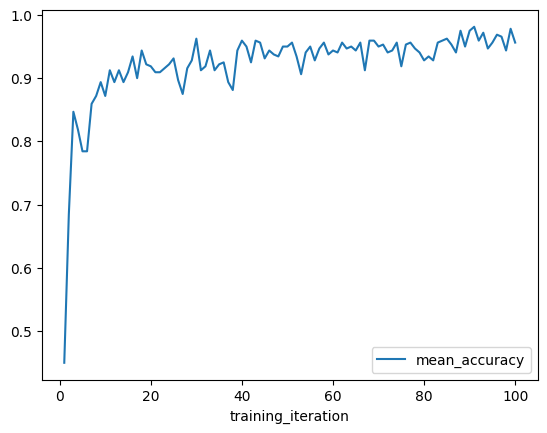

In [ ]:
best_result.metrics_dataframe.plot("training_iteration", "mean_accuracy")

Text(0, 0.5, 'Mean Test Accuracy')

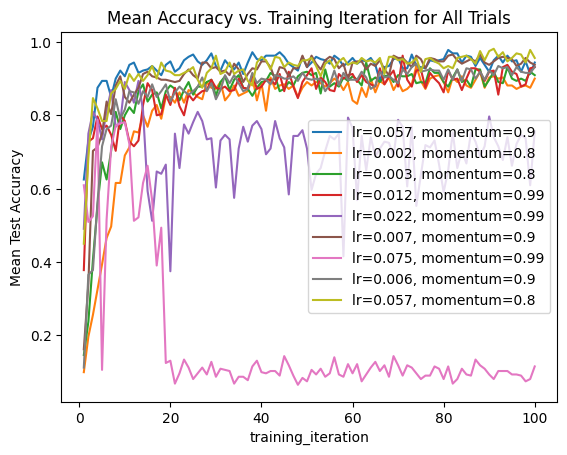

In [ ]:
ax = None
for result in result_grid:
    label = f"lr={result.config['lr']:.3f}, momentum={result.config['momentum']}"
    if ax is None:
        ax = result.metrics_dataframe.plot("training_iteration", "mean_accuracy", label=label)
    else:
        result.metrics_dataframe.plot("training_iteration", "mean_accuracy", ax=ax, label=label)
ax.set_title("Mean Accuracy vs. Training Iteration for All Trials")
ax.set_ylabel("Mean Test Accuracy")

Accessing checkpoints and loading for test inference

In [ ]:
import torch

from ray.tune.examples.mnist_pytorch import ConvNet, get_data_loaders

model = ConvNet()

with best_result.checkpoint.as_directory() as checkpoint_dir:
    # The model state dict was saved under `model.pt` by the training function
    # imported from `ray.tune.examples.mnist_pytorch`
    model.load_state_dict(torch.load(os.path.join(checkpoint_dir, "model.pt")))

Predicted Class = 2


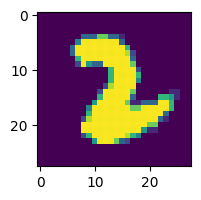

In [ ]:
import matplotlib.pyplot as plt

_, test_loader = get_data_loaders()
test_img = next(iter(test_loader))[0][0]

predicted_class = torch.argmax(model(test_img)).item()
print("Predicted Class =", predicted_class)

# Need to reshape to (batch_size, channels, width, height)
test_img = test_img.numpy().reshape((1, 1, 28, 28))
plt.figure(figsize=(2, 2))
plt.imshow(test_img.reshape((28, 28)))